# Spatial transcriptomics application from MEFISTO paper

https://github.com/bioFAM/MEFISTO_tutorials/blob/master/MEFISTO_ST.ipynb

In [9]:
%load_ext autoreload
%autoreload 2

import warnings

import scanpy as sc
from data_loader import load_mefisto_visium

from famo.core import CORE
from famo.plotting import (
    plot_factor_correlation,
)

warnings.simplefilter(action="ignore", category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
adata = load_mefisto_visium()

/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:275: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/data/walter/miniconda3/envs/famo/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitMo

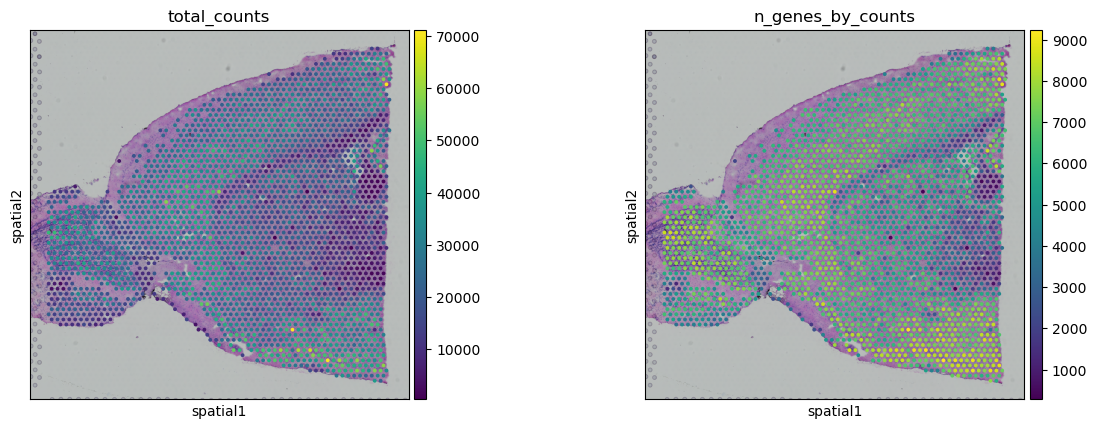

In [5]:
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts"])

In [8]:
model = CORE(device="cuda")
model.fit(
    n_factors=4,
    data=adata,
    factor_prior="GP",
    weight_prior="ARD_Spike_and_Slab",
    covariates_obsm_key="spatial",
    lr=0.005,
    early_stopper_patience=500,
    print_every=100,
    center_groups=True,
    scale_views=False,
    scale_groups=True,
    max_epochs=10000,
    save=True,
    save_path="trained_model",
    init_factors="random",
    init_scale=0.1,
)

Setting up device...
- No device id given. Using default device: 0
- Running all computations on `cuda:0`
- No likelihoods provided. Inferring likelihoods from data.
  - view_1: Normal
- Centering group_1/view_1...


alt.Chart(...)

Initializing factors using `random` method...
Decaying learning rate over 10000 iterations.
Setting training seed to `2409091817`.
Cleaning parameter store.
Epoch:       0 | Time:       1.22s | Loss:    2413.36
Epoch:     100 | Time:       3.68s | Loss:    1857.62
Epoch:     200 | Time:       6.24s | Loss:    1503.41
Epoch:     300 | Time:       8.70s | Loss:    1275.82
Epoch:     400 | Time:      11.13s | Loss:    1130.61
Epoch:     500 | Time:      13.60s | Loss:    1050.94
Epoch:     600 | Time:      16.06s | Loss:    1007.17
Epoch:     700 | Time:      18.49s | Loss:     985.78
Epoch:     800 | Time:      20.91s | Loss:     979.53
Epoch:     900 | Time:      23.35s | Loss:     974.84
Epoch:    1000 | Time:      25.78s | Loss:     969.72
Epoch:    1100 | Time:      28.21s | Loss:     966.91
Epoch:    1200 | Time:      30.64s | Loss:     967.20
Epoch:    1300 | Time:      33.07s | Loss:     966.80
Epoch:    1400 | Time:      35.52s | Loss:     964.60
Epoch:    1500 | Time:      37.95

In [10]:
plot_factor_correlation(model)

alt.HConcatChart(...)

In [11]:
z = model.get_factors()['group_1']
adata.obs = adata.obs.join(z)

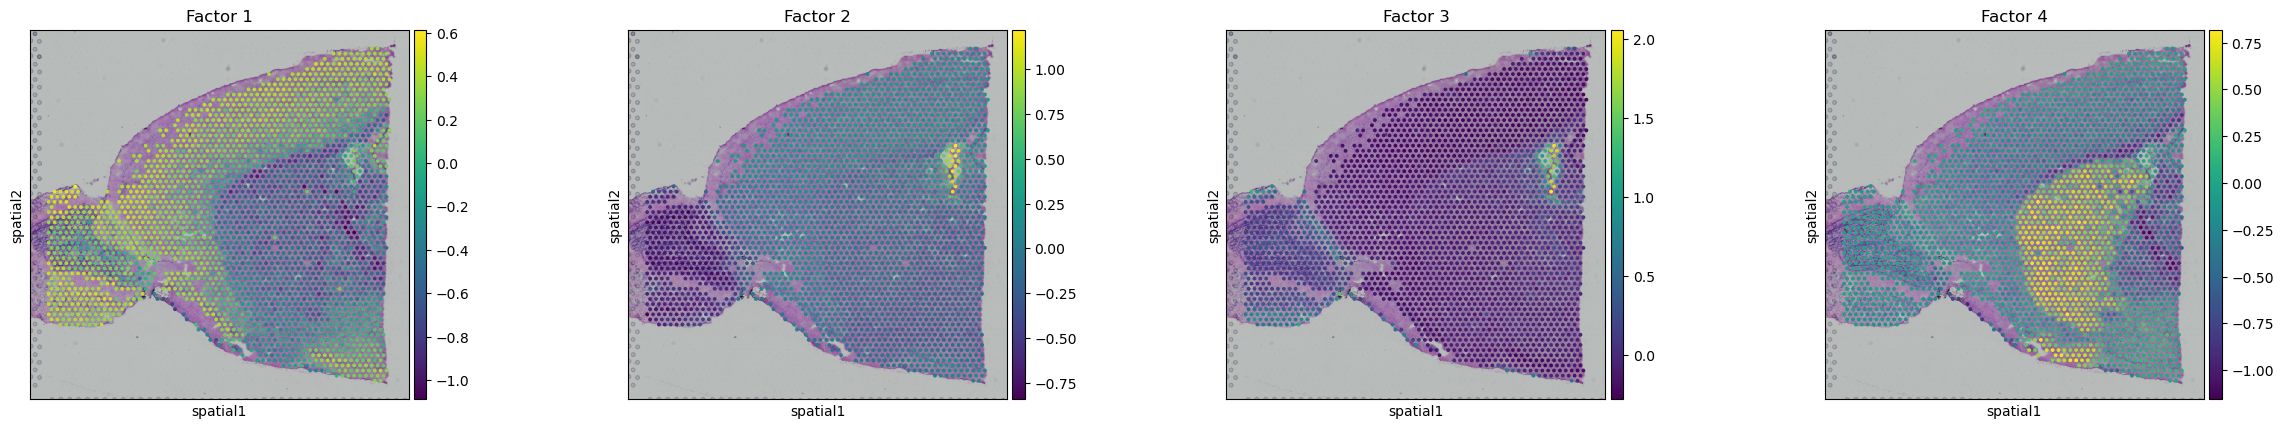

In [14]:
sc.pl.spatial(adata, img_key="hires", color=[f"Factor {i+1}" for i in range(model.n_factors)])